<a href="https://colab.research.google.com/github/nilamaula26/Praktikum-Kuliah/blob/main/RFM%20and%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score

rfm = pd.read_excel("rfm.xlsx")

In [2]:
# rfm.describe()

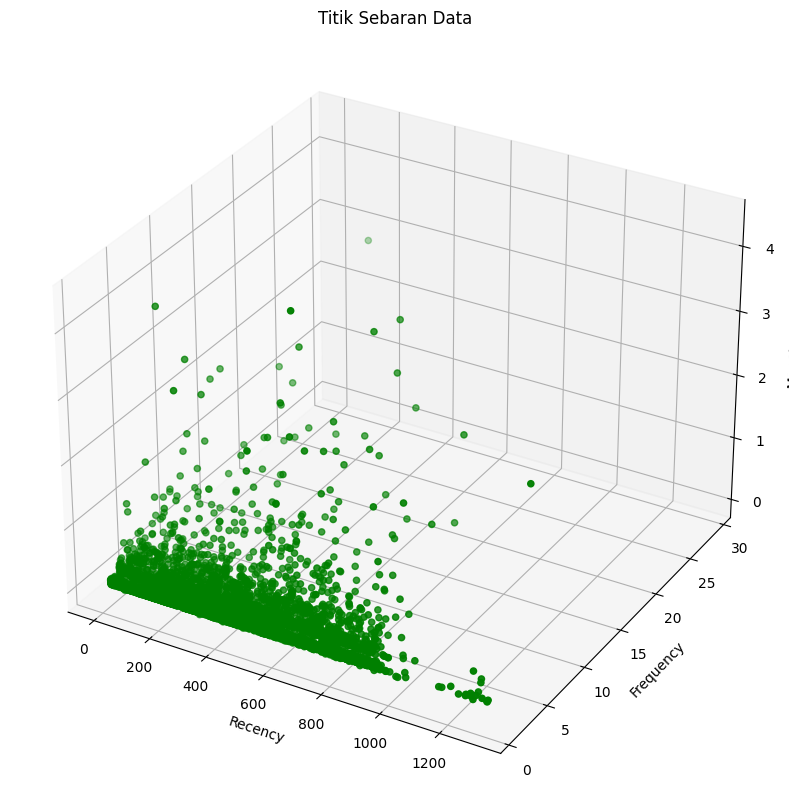

In [3]:
# Membuat data acak
x = rfm['recency']  # Assuming 'recency' is the first column
y = rfm['frequency']  # Assuming 'frequency' is the second column
z = rfm['monetary']  # Assuming 'monetary' is the third column

# Membuat figure
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")

# Membuat scatter plot
ax.scatter3D(x, y, z, color="green")
ax.set_title("Titik Sebaran Data")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.savefig("data.png", format='png')
# Menampilkan plot
plt.show()

In [4]:
# Standarisasi fitur
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [5]:
# Menggunakan len() untuk menghitung jumlah data
jumlah_data = len(rfm_scaled)

print("Jumlah data:", jumlah_data)

Jumlah data: 9010


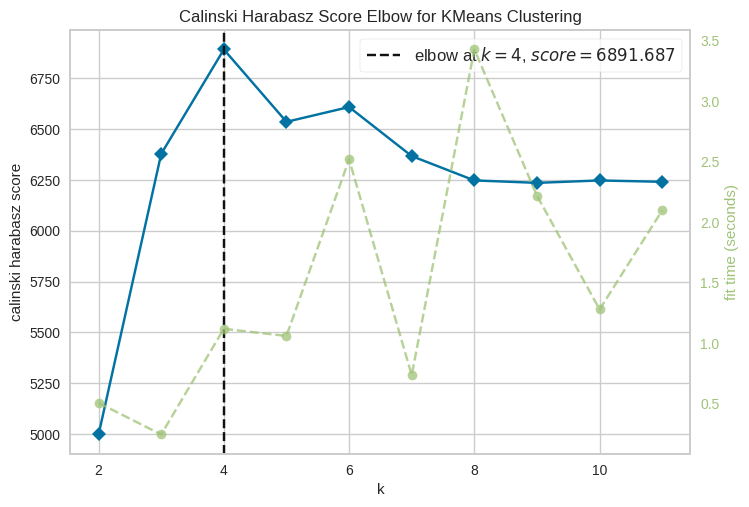

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [6]:
# from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Change X with rfm_scaled dataset
X = rfm_scaled

# Initiate the clustering model and visualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=True
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

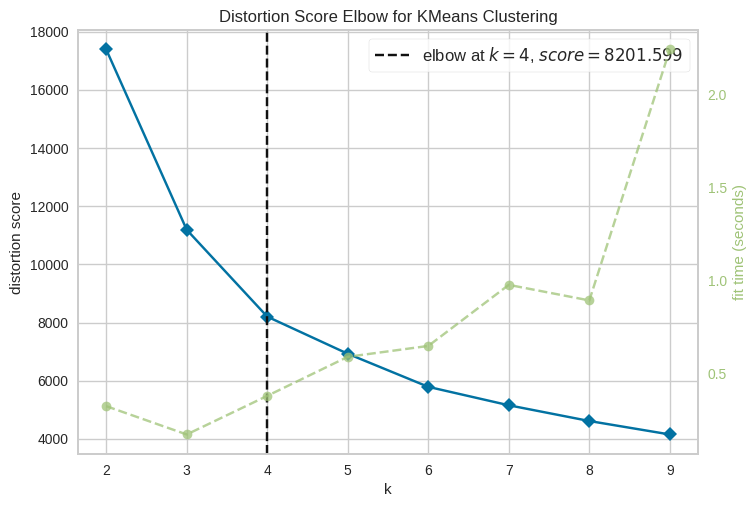

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, n_init=10, random_state=0),
                 k=(2, 10))

In [7]:
from yellowbrick.cluster.elbow import kelbow_visualizer
# change X with rfm_scaled dataset
X = rfm_scaled
# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=0, n_init=10),
                  X, k=(2,10))

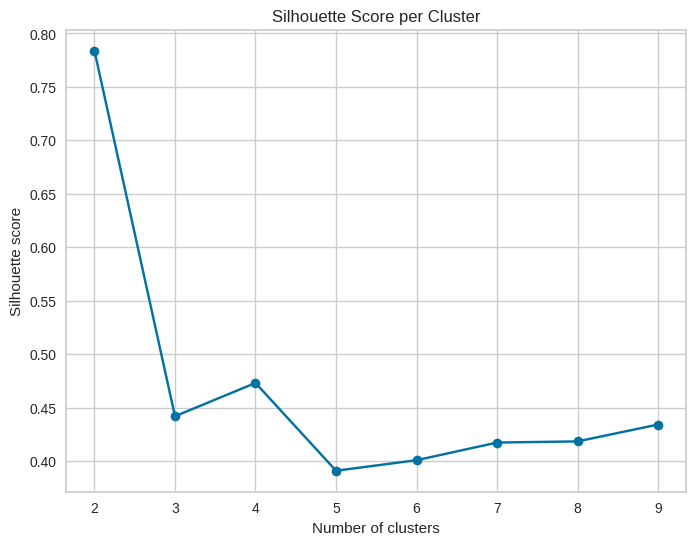

In [8]:
cluster_range = range(2, 10)
# List to store silhouette scores
silhouette_scores = []

for n_clusters in cluster_range:
    # Initialize the clusterer with n_clusters value
    # and a random generator
    clusterer = KMeans(n_clusters=n_clusters,
                       random_state=0, n_init=10)
    cluster_labels = clusterer.fit_predict(rfm_scaled)

    # The silhouette_score gives the average value for
    # all the samples
    # This gives a perspective into the density and separation
    # of the formed clusters
    silhouette_avg = silhouette_score(rfm_scaled,
                                      cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores per cluster number
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score per Cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

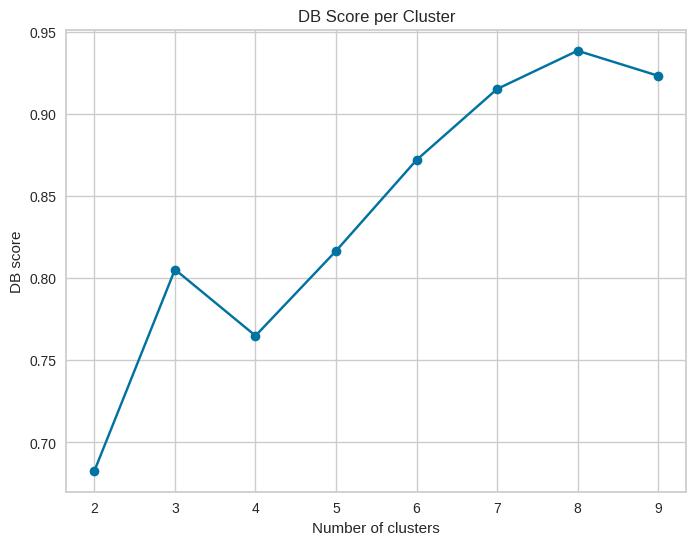

In [9]:
from sklearn.metrics import davies_bouldin_score
cluster_range = range(2, 10)
# List to store silhouette scores
davies_bouldin_scores = []

for n_clusters in cluster_range:
    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    cluster_labels = clusterer.fit_predict(rfm_scaled)

    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    db_sc = davies_bouldin_score(rfm_scaled, cluster_labels)
    davies_bouldin_scores.append(db_sc)
    # print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plotting the silhouette scores per cluster number
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.title('DB Score per Cluster')
plt.xlabel('Number of clusters')
plt.ylabel('DB score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(rfm_scaled)

labels = kmeans.labels_

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers = pd.DataFrame(cluster_centers)
print("Labels:", labels)
print(f"Jumlah iterasi: {kmeans.n_iter_}")
print("Cluster Centers:\n")
cluster_centers.head()

Labels: [1 0 1 ... 0 0 0]
Jumlah iterasi: 14
Cluster Centers:



,0,1,2
0,-0.718851,-0.197775,-0.210515
1,0.988163,-0.236460,-0.158352
2,0.179896,6.655336,8.279729
3,-0.028459,1.967987,1.458161


In [11]:
from sklearn.metrics import pairwise_distances
# Menghitung jarak antar pusat-pusat klaster (Euclidean distance)
cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')
cluster_distances = pd.DataFrame(cluster_distances)
# Menampilkan hasil
print("Jarak antar pusat klaster (Euclidean distance):")
cluster_distances.head()

Jarak antar pusat klaster (Euclidean distance):


,0,1,2,3
0,0.000000,1.708249,1.094793e+01,2.819866
1,1.708249,0.000000,1.092480e+01,2.916543
2,10.947927,10.924804,1.685874e-07,8.279399
3,2.819866,2.916543,8.279399e+00,0.000000


In [12]:
cluster_counts = Counter(labels)

print(cluster_counts)

Counter({0: 4793, 1: 3492, 3: 651, 2: 74})


In [13]:
ss = silhouette_score(rfm_scaled, labels)
print("K-Means Silhouette Score: ", ss)

K-Means Silhouette Score:  0.47308604931999937


In [14]:
n_cluster = 10  # Misalnya, jumlah cluster yang diinginkan
# Membuat label_mapping secara otomatis
label_mapping = {i: f'Cluster {i+1}' for i in range(n_cluster)}
# Ubah label dengan mapping yang telah dibuat
new_labels = [label_mapping[label] for label in labels]

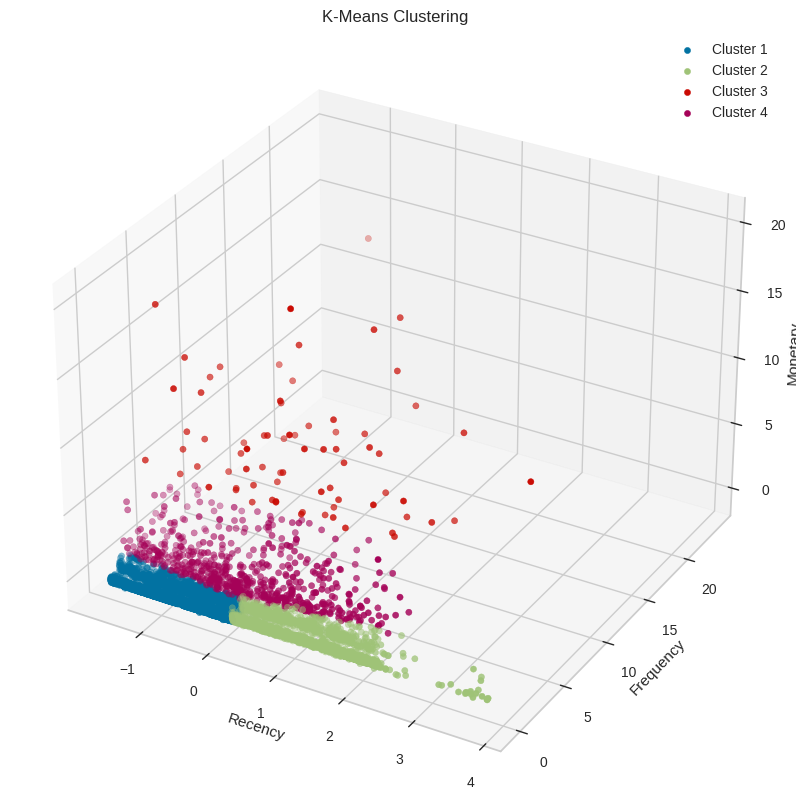

In [15]:
# Membuat figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot untuk setiap cluster
for i in range(max(labels)+1):
    filtered_label_i = rfm_scaled[labels == i]
    ax.scatter(filtered_label_i[:,0], filtered_label_i[:,1], filtered_label_i[:,2], label=label_mapping[i])

ax.set_title('K-Means Clustering')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.savefig("cluster.png", format='png')
plt.show()


In [16]:
# rfm_scaled = pd.DataFrame(rfm_scaled)
# rfm_scaled.to_excel('rfm standarisasi.xlsx', index=False)

In [17]:
rfm['Cluster']=new_labels
clustered=rfm
clustered.to_excel('clustered.xlsx',index=False)

In [18]:
clustered = pd.read_excel("clustered.xlsx")

In [19]:
cluster_means = {}
# Iterasi untuk menghitung mean per cluster
for index, row in clustered.iterrows():
    cluster_label = row['Cluster']  # Ambil nilai label cluster dari kolom 'Cluster'
    if cluster_label not in cluster_means:
        cluster_means[cluster_label] = []
    cluster_means[cluster_label].append(row[['recency', 'frequency', 'monetary']])  # Ambil nilai fitur

# Menghitung rata-rata untuk setiap cluster
for cluster_label, values in cluster_means.items():
    cluster_means[cluster_label] = np.mean(values, axis=0)

# Konversi hasil ke dalam DataFrame
cluster_means_df = pd.DataFrame(cluster_means).T  # .T digunakan untuk transpose agar cluster_label menjadi kolom

cluster_means_df.head()

,0,1,2
Cluster 2,636.265178,1.179267,119949.001432
Cluster 1,233.694137,1.224077,109056.446902
Cluster 3,445.648649,9.162162,1881963.513514
Cluster 4,396.511521,3.732719,457504.25192


In [20]:
grouped = clustered.groupby('Cluster').describe()


In [21]:
print(grouped)

          recency                                                       \
            count        mean         std    min     25%    50%    75%   
Cluster                                                                  
Cluster 1  4793.0  233.694137  122.347738    1.0  140.00  235.0  334.0   
Cluster 2  3492.0  636.265178  137.476473  434.0  526.00  609.0  743.0   
Cluster 3    74.0  445.648649  253.021924    9.0  249.25  444.5  603.0   
Cluster 4   651.0  396.511521  218.982243    2.0  223.50  393.0  558.0   

                  frequency            ...              monetary  \
              max     count      mean  ...    75%   max    count   
Cluster                                ...                         
Cluster 1   437.0    4793.0  1.224077  ...   1.00   3.0   4793.0   
Cluster 2  1307.0    3492.0  1.179267  ...   1.00   3.0   3492.0   
Cluster 3  1236.0      74.0  9.162162  ...  11.75  29.0     74.0   
Cluster 4   935.0     651.0  3.732719  ...   4.00   8.0    651.0   

    

In [22]:
# grouped.to_excel('grouped.xlsx')